In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("data.csv")

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [47]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Checking For NullValues

In [48]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
# Drop unnecessary columns 
df = df.drop('CustomerID', axis=1)

In [50]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


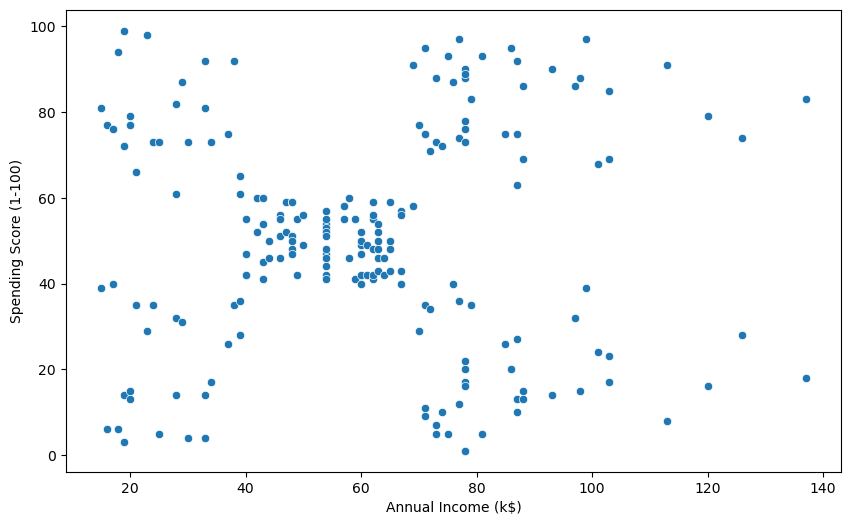

In [51]:
#Scatter plot of X
plt.figure(figsize=(10, 6)) 
sns.scatterplot(X, x= "Annual Income (k$)", y= "Spending Score (1-100)")
plt.show()

Data PreProcessing

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

K Means usiing scikit learn


In [53]:
# Training the K-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

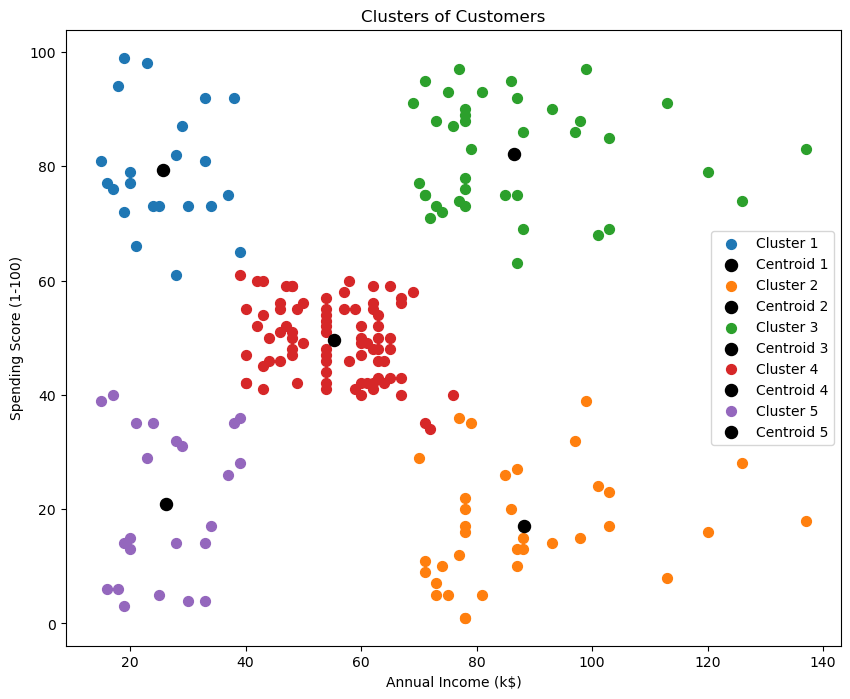

In [54]:
#Visualization
plt.figure(figsize=(10, 8))
for cluster_label in range(5):  # Loop through each cluster label
    cluster_points = X[kmeans.labels_ == cluster_label]
    
    centroid = cluster_points.mean(axis=0)  # Calculate the centroid as the mean position of the data points
    
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
                s=50, label=f'Cluster {cluster_label + 1}')  # Plot points for the current cluster
    
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='.', label=f'Centroid {cluster_label + 1}')  # Plot the centroid


plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

K Means from Scratch

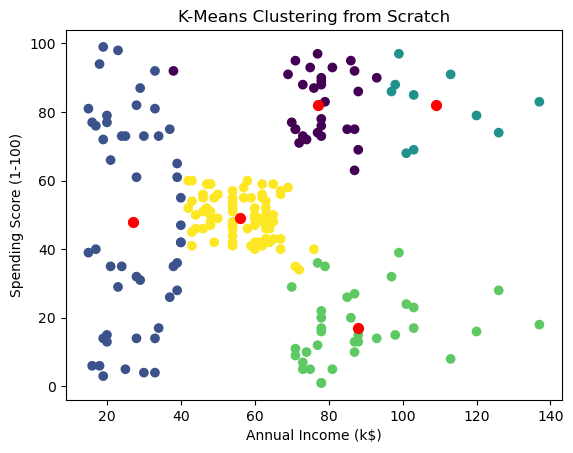

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans_from_scratch(X, k, max_iters=100):
    n_samples, n_features = X.shape
    
    # Randomly initialize centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each sample to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return labels, centroids

# Load the data from CSV
file_path = 'data.csv'  
data = pd.read_csv(file_path)

# Extract relevant columns
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Set the number of clusters (k)
k = 5

# Apply K-Means from scratch
labels_scratch, centroids_scratch = kmeans_from_scratch(X, k)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap='viridis')
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], marker='.', s=200, c='red')

plt.title('K-Means Clustering from Scratch')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


# Inference

## K-Means Clustering Results Comparison




In [64]:
from sklearn.cluster import KMeans

# Inertia for scikit-learn
inertia_sklearn = kmeans_sklearn.inertia_

# Number of clusters for scikit-learn
n_clusters_sklearn = len(set(kmeans_sklearn.labels_))

# Compare labels and centroids
print("Scikit-learn K-Means Inertia:", inertia_sklearn)
print("Scikit-learn Number of Clusters:", n_clusters_sklearn)
print("Scikit-learn Cluster Labels:", kmeans_sklearn.labels_)

# Using from scratch
# Calculate inertia for from scratch implementation
scratch_inertia = np.sum((X - centroids_scratch[labels_scratch])**2)

# Number of clusters for from scratch
n_clusters_scratch = len(set(labels_scratch))

# Compare labels and centroids
print("\nFrom Scratch K-Means Inertia:", scratch_inertia)
print("From Scratch Number of Clusters:", n_clusters_scratch)
print("From Scratch Cluster Labels:", labels_scratch)


Scikit-learn K-Means Inertia: 3.5831179059525606
Scikit-learn Number of Clusters: 5
Scikit-learn Cluster Labels: [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]

From Scratch K-Means Inertia: Annual Income (k$)        22147
Spending Score (1-100)    52869
dtype: int64
From Scratch Number of Clusters: 5
From Scratch Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 4 0 3 0 3 0 4 0 3 0 3 0 3 0 3 0 4 0 3 0 3 0
 3 0 3 0

## In Words

Inertia:

Scikit-learn K-Means Inertia: 3.58
From Scratch K-Means Inertia: 74916 (Sum of squared distances to centroids)
Inference: The inertia represents the sum of squared distances of samples to their closest cluster center. A lower inertia indicates better clustering. In this case, the scikit-learn implementation has a lower inertia, suggesting a better fit to the data.

Number of Clusters:

Scikit-learn Number of Clusters: 5
From Scratch Number of Clusters: 5
Inference: Both implementations identify the same number of clusters, which is expected since you set n_clusters=5 for both.

Visualization:
The visualization for the scikit-learn implementation shows distinct clusters and centroids.
The visualization for the from-scratch implementation, you can observe the general grouping.

Conclusion:

The scikit-learn implementation appears to have a better fit to the data based on the lower inertia.
Both implementations identify the same number of clusters, but the overall clustering patterns are similar.